In [1]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
X, y = mnist["data"], mnist["target"]

In [2]:
import numpy as np
digits = 10
examples = y.shape[0]

y = y.reshape(1, examples)

Y_new = np.eye(digits)[y.astype('int32')]
Y_new = Y_new.T.reshape(digits, examples)

In [3]:
m = 60000
m_test = X.shape[0] - m

X_train, X_test = X[:m].T, X[m:].T
Y_train, Y_test = Y_new[:,:m], Y_new[:,m:]

shuffle_index = np.random.permutation(m)
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]

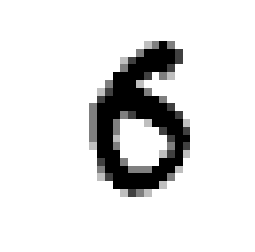

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [5]:
import matplotlib
import matplotlib.pyplot as plt
i = 12
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
Y_train[:,i]

In [8]:
def compute_multiclass_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum

    return L

def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [9]:
n_x = X_train.shape[0]
n_h = 64
learning_rate = 1

W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(digits, n_h)
b2 = np.zeros((digits, 1))

X = X_train
Y = Y_train

for i in range(2000):

    Z1 = np.matmul(W1,X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

    cost = compute_multiclass_loss(Y, A2)

    dZ2 = A2-Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

/home/sai/.virtualenvs/Tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


Epoch 0 cost:  9.41127696093033
Epoch 100 cost:  0.8563643176760651
Epoch 200 cost:  0.6511151457790245
Epoch 300 cost:  0.5758321501916777
Epoch 400 cost:  0.5307804380417234
Epoch 500 cost:  0.5039025955648582
Epoch 600 cost:  0.4838116682112184
Epoch 700 cost:  0.4662533176824913
Epoch 800 cost:  0.45431251493415414
Epoch 900 cost:  0.4421073753295777
Epoch 1000 cost:  0.43660183567815636
Epoch 1100 cost:  0.4291528901127708
Epoch 1200 cost:  0.42090692421246695
Epoch 1300 cost:  0.41367806311432986
Epoch 1400 cost:  0.4115446223387772
Epoch 1500 cost:  0.40404363289669754
Epoch 1600 cost:  0.397899145242487
Epoch 1700 cost:  0.39577643663043605
Epoch 1800 cost:  0.3900320525791307
Epoch 1900 cost:  0.3888337130506206
Final cost: 0.3863953650919834


In [10]:
from sklearn.metrics import classification_report, confusion_matrix

Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_test, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[ 902    0   20    7    2   25   23    4   16   13]
 [   0 1095   13    2    3    5    4   10    7    6]
 [  12    5  851   27    6   13   13   25   15   11]
 [   7    8   31  853    1   52    3   10   32   14]
 [   2    1   21    3  849   22   21   14   19   58]
 [  22    3    4   51    4  690   21    5   49   15]
 [  17    6   22    2   24   19  851    3   22    5]
 [   6    2   20   19    7    9    2  885   19   37]
 [   8   14   42   30    7   43   16   14  765   17]
 [   4    1    8   16   79   14    4   58   30  833]]
             precision    recall  f1-score   support

          0       0.92      0.89      0.91      1012
          1       0.96      0.96      0.96      1145
          2       0.82      0.87      0.85       978
          3       0.84      0.84      0.84      1011
          4       0.86      0.84      0.85      1010
          5       0.77      0.80      0.79       864
          6       0.89      0.88      0.88       971
          7       0.86      0.88      0.87  

/home/sai/.virtualenvs/Tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
